<a href="https://colab.research.google.com/github/TinizaraRodriguez/_easyOCR/blob/_easyOCR_img_puerto/_easyOCR_img_puertos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install easyocr
!pip install imutils
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.0 MB/s eta 0:00:00


In [4]:
import os
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import re
import regex

In [17]:
IMAGE_PATH = '/content/1696238812.7469993.jpeg'
reader = easyocr.Reader(['es'])
result = reader.readtext(IMAGE_PATH)
result

[([[1921, 57], [1991, 57], [1991, 97], [1921, 97]], '800', 0.9921262591978149),
 ([[1038, 249], [1283, 249], [1283, 289], [1038, 289]],
  '79-TE-3-367-97',
  0.6767754997524651),
 ([[2058, 440], [2155, 440], [2155, 493], [2058, 493]],
  'TR',
  0.9973272512912397),
 ([[0, 970], [30, 970], [30, 1002], [0, 1002]], '008', 0.9304882385572828),
 ([[1250, 1060], [1296, 1060], [1296, 1086], [1250, 1086]],
  '220',
  0.24058796309083344),
 ([[1515, 1277], [1555, 1277], [1555, 1313], [1515, 1313]],
  'GC',
  0.8650706874320667),
 ([[1924, 1356], [1960, 1356], [1960, 1382], [1924, 1382]],
  'GC',
  0.9589649388318137),
 ([[1996, 1358], [2038, 1358], [2038, 1384], [1996, 1384]],
  '222',
  0.9999832065931312),
 ([[2048, 1358], [2078, 1358], [2078, 1384], [2048, 1384]],
  '06',
  0.9997357494871242),
 ([[1770.930985278494, 70.44816761268697],
   [1921.6650082918216, 57.20063965886881],
   [1923.069014721506, 101.55183238731303],
   [1772.3349917081784, 114.79936034113119]],
  'NOBMAAM',
  0.172947

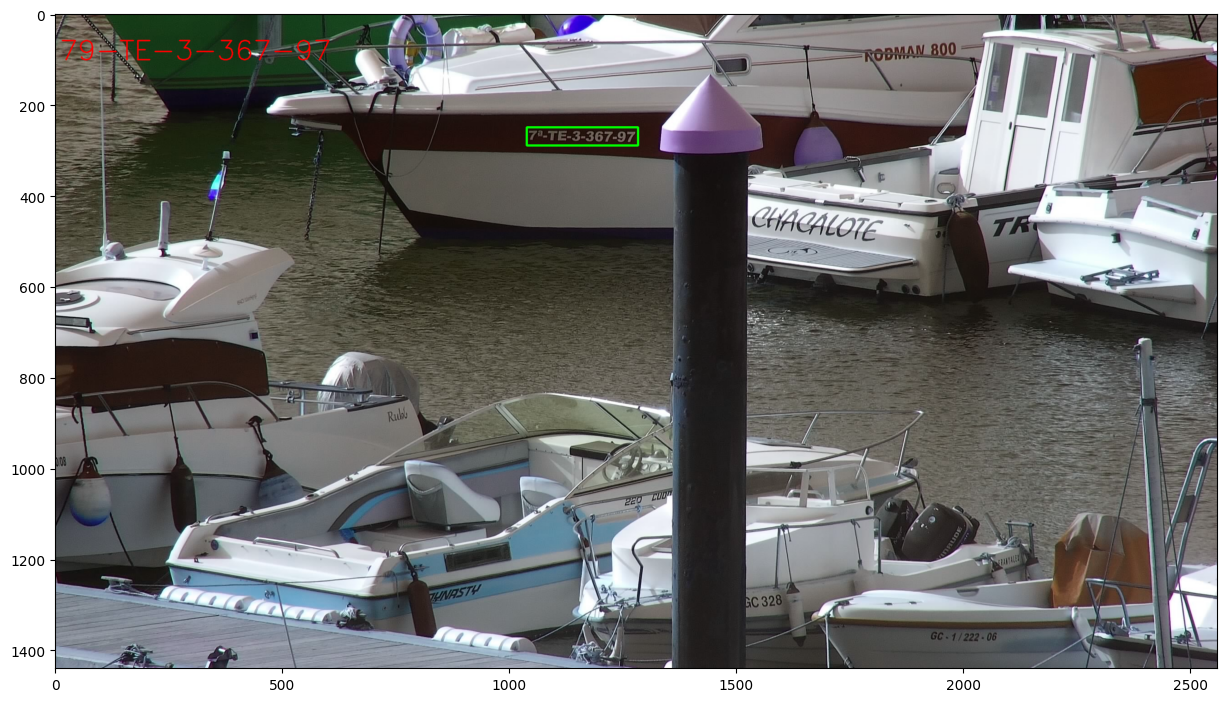

In [52]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
font = cv2.FONT_HERSHEY_SIMPLEX
matriculas = r'^[0-9]{2}-[A-Z]{2}-[0-9]-[0-9]{3}-[0-9]{2}$'
#matriculas = r'^[0-9]{2}-[A-Z]{2}-[0-9]-[0-9]{1|2|3}-[0-9]{2}$'


for detection in result:
  if re.match(matriculas, detection[1]):
    top_left = tuple(map(int, detection[0][0]))
    bottom_right = tuple(map(int, detection[0][2]))
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(10,spacer), font, 2,(255,0,0),2,cv2.LINE_AA)
    spacer+=30
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()